# Imports

In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import sys
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

import re
#import command

D:\Anaconda_app\envs\fastai\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [17]:
from imports import *
from structured import *

In [ ]:
f'{2*8}'

In [ ]:
name = "Eric"
age = 74
f"Hello, {name}. You are {age}."

# Read Data

In [3]:
def load_df(csv_path='input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [51]:
df_temp = load_df('input/test.csv')

Loaded test.csv. Shape: (804684, 53)


In [52]:
def display_all(df):
    with pd.option_context('display.max_rows',1000,'display.max_columns',1000):
        display(df)

In [53]:
display_all(df_temp.head().T)

,0,1,2,3,4
channelGrouping,Organic Search,Organic Search,Organic Search,Organic Search,Organic Search
date,20171016,20171016,20171016,20171016,20171016
fullVisitorId,6167871330617112363,0643697640977915618,6059383810968229466,2376720078563423631,2314544520795440038
sessionId,6167871330617112363_1508151024,0643697640977915618_1508175522,6059383810968229466_1508143220,2376720078563423631_1508193530,2314544520795440038_1508217442
socialEngagementType,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged,Not Socially Engaged
visitId,1508151024,1508175522,1508143220,1508193530,1508217442
visitNumber,2,1,1,1,1
visitStartTime,1508151024,1508175522,1508143220,1508193530,1508217442
device.browser,Chrome,Chrome,Chrome,Safari,Safari
device.browserSize,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [ ]:
df_temp.describe(include='all')

# inital process

In [55]:
df_temp['visitStartTime']=pd.to_datetime(df_temp['visitStartTime'], unit='s')

In [54]:
df_temp["totals.transactionRevenue"].fillna(0, inplace=True)

KeyError: 'totals.transactionRevenue'

In [46]:
df_temp['totals.transactionRevenue'] = np.log1p(df_temp['totals.transactionRevenue'].astype('float'))

In [8]:
gdf = df_temp.groupby('fullVisitorId')['totals.transactionRevenue'].sum().reset_index()

In [9]:
gdf.head()

,fullVisitorId,totals.transactionRevenue
0,0000174067426171406,0.0
1,0000245437374675368,0.0
2,0000750929315523353,0.0
3,0001156383977201253,0.0
4,0001213046045394417,0.0


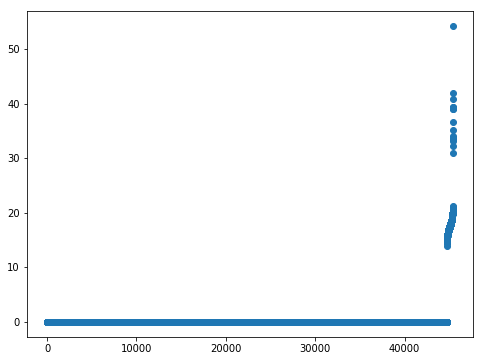

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]),np.sort(gdf['totals.transactionRevenue']))

In [56]:
add_datepart(df_temp,'visitStartTime')

In [12]:
df_temp.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,device.browser,device.browserSize,device.browserVersion,...,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,Chrome,not available in demo dataset,not available in demo dataset,...,2,4,246,False,False,False,False,False,False,1472830385
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,Firefox,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472880147
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,Chrome,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472865386
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,UC Browser,not available in demo dataset,not available in demo dataset,...,3,5,247,False,False,False,False,False,False,1472881213
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,Chrome,not available in demo dataset,not available in demo dataset,...,2,4,246,False,False,False,False,False,False,1472822600


In [57]:
train_cats(df_temp)

In [49]:
df_temp.channelGrouping.cat.categories

Index(['(Other)', 'Affiliates', 'Direct', 'Display', 'Organic Search',
       'Paid Search', 'Referral', 'Social'],
      dtype='object')

In [58]:
os.makedirs('tmp', exist_ok=True)
df_temp.to_feather('tmp/test')

# pre_precessing

In [96]:
df_temp = pd.read_feather('tmp/train')

In [97]:
df, y, nas = proc_df(df_temp, 'totals.transactionRevenue')

In [36]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,device.browser,device.browserSize,device.browserVersion,...,visitStartTimeDay,visitStartTimeDayofweek,visitStartTimeDayofyear,visitStartTimeIs_month_end,visitStartTimeIs_month_start,visitStartTimeIs_quarter_end,visitStartTimeIs_quarter_start,visitStartTimeIs_year_end,visitStartTimeIs_year_start,visitStartTimeElapsed
0,5,20160902,5065,5542,1,1472830385,1,6,1,1,...,2,4,246,False,False,False,False,False,False,1472830385
1,5,20160902,16968,18614,1,1472880147,1,9,1,1,...,3,5,247,False,False,False,False,False,False,1472880147
2,5,20160902,17482,19196,1,1472865386,1,6,1,1,...,3,5,247,False,False,False,False,False,False,1472865386
3,5,20160902,21437,23580,1,1472881213,1,26,1,1,...,3,5,247,False,False,False,False,False,False,1472881213
4,5,20160902,12264,13418,1,1472822600,2,6,1,1,...,2,4,246,False,False,False,False,False,False,1472822600


In [98]:
def split_values(a,n): return a[:n].copy(), a[n:].copy()
n_valid = 200000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_values(df_temp,n_trn)
X_train, X_valid = split_values(df,n_trn)
y_train, y_valid = split_values(y,n_trn)

In [99]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())
def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [67]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 33.1 s
[1.0513399419980147, 1.665862492771437, 0.72555102238532299, 0.30110563552569625, 0.28305177234932999]


# feature importance

In [100]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 11.7 s
[1.628818324487044, 1.6925965386366426, 0.34125007018093623, 0.27849368731631174, 0.28277215203406425]


In [101]:
fi = rf_feat_importance(m, df); fi[:20]

,cols,imp
37,totals.pageviews,0.252260
35,totals.hits,0.146564
3,sessionId,0.052963
2,fullVisitorId,0.051842
56,visitStartTimeDay,0.045686
65,visitStartTimeElapsed,0.044978
5,visitId,0.041540
58,visitStartTimeDayofyear,0.035346
6,visitNumber,0.034878
1,date,0.027743


In [102]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

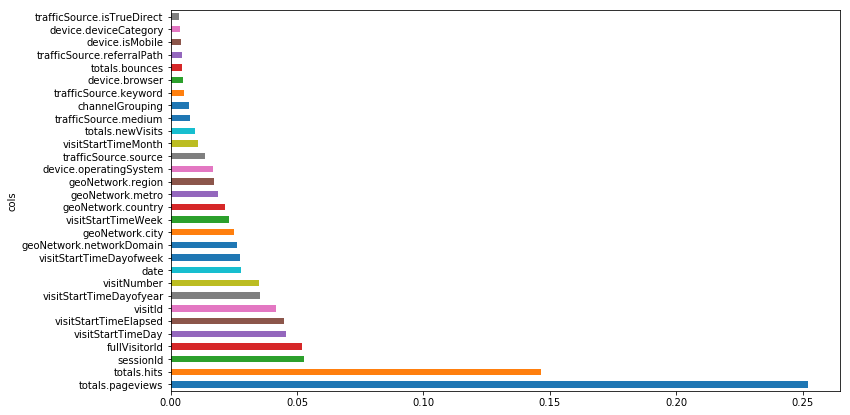

In [103]:
plot_fi(fi[:30])

In [104]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)

24

In [105]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_values(df_keep, n_trn)

In [106]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,max_features=0.5,n_estimators=40,oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

Wall time: 5.36 s
[1.6359573654451902, 1.7005413396127778, 0.33546286992853691, 0.27170450036306593, 0.27622284676347431]


# one_hot encoding

In [107]:
df_trn2, y_trn, nas = proc_df(df_temp, 'totals.transactionRevenue', max_n_cat=7)

In [112]:
X_train, X_valid = split_values(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[1.6247259806667897, 1.688884564918296, 0.34455607991504844, 0.28165483725679952, 0.28555659169607839]


In [113]:
len(X_train),len(X_valid)

(703653, 200000)

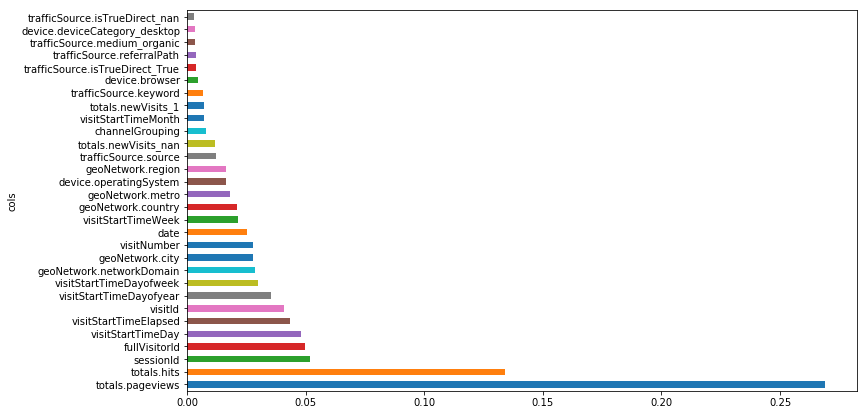

In [115]:
fi = rf_feat_importance(m, df_trn2)
plot_fi(fi[:30])

# removing redundant features

In [116]:
from scipy.cluster import hierarchy as hc

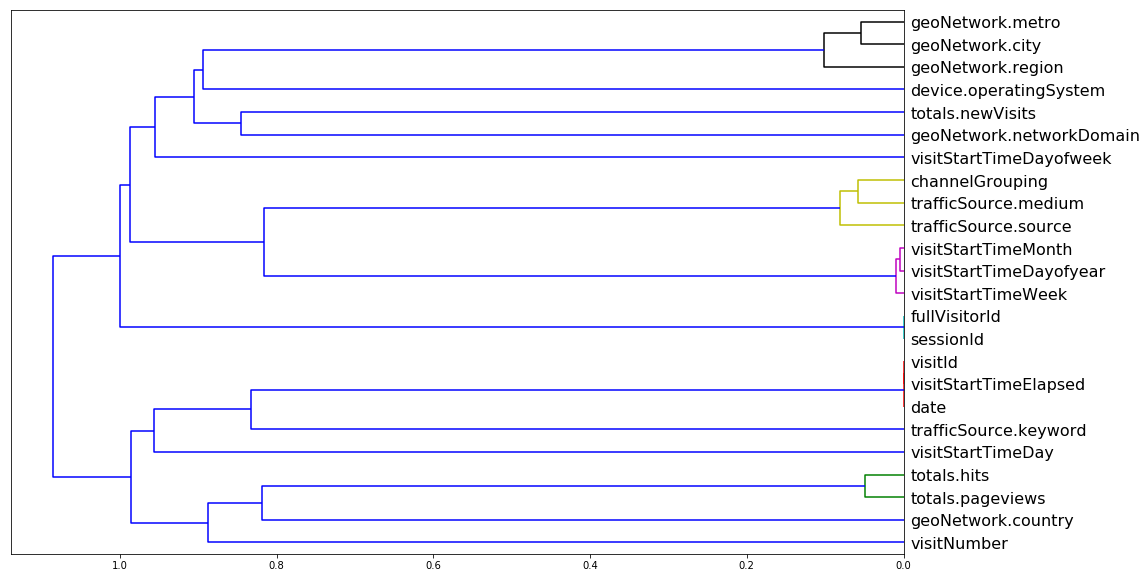

In [117]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()